<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



Esta es una notebook autocontenida para el análisis de datos de la tabla de características de las carpetas de las imágenes del repositorio [Deuba](https://gitlab.com/ciiiutnfrc/deuba) propuesto para la mentoría *'Detección de objetos en imágenes'*.

Para detalles como se encontró la tabla que vamos a utilizar, revisen la notebook [0_DetecciónObjetos_ArmandoLaTabla.ipynb](0_DetecciónObjetos_ArmandoLaTabla.ipynb)


<a name="exploratory_data_analysis"></a>
## **Consignas para la materia  Introducción al Aprendizaje Automático**

### 1 General 
*FECHA LíMITE DE ENTREGA: 15/08*

Realizar un informe en formato notebook, en la cual se presenten los resultados del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver (por ejemplo, sus compañer@s de clase).

Se evaluará principalmente la claridad del mensaje presentado, el uso de las herramientas y los conceptos desarrollados durante las clases de la materia " Introducción al Aprendisaje Automático". Asimismo, el mismo debe incluir de manera clara los hallazgos y problemas encontrados y las posibles accionar a tomar.

Se aconseja que el informe tenga una estructura ordenada, clara y fácil de leer. Por ejemplo, podría contar con una introducción a la problemática a resolver, una descripción de los datos a emplear, el desarrollo propiamente dicho de todo el trabajo y las conclusiones que se obtuvieron.



### 2 Consignas de Aprendisaje Automático

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

##### Preparando el dataSet:

Teniendo en cuenta los resultados de las entregas anteriores en cuanto al desbalance del dataSet o al posible sesgo, proponer una nueva separación (80/20) entre train test del dataset original .

  1- Recordar que en nuestro caso podemos realizar clasificación binaria (ccb y csb) . Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

 
  2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir como mucho las 5 mas representativas para:

##### Regresión:

 * Hacer una gráfica que muestre su relación con la variable objetivo.
 * Instanciar una regresión lineal de scikit-learn, y entrenarla usando sólo el atributo seleccionado.
 * Calcular el error cuadrático medio para los conjuntos de entrenamiento y evaluación y grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación. 
 * Interpretar el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.  
    
 * Tomar pares de características y considerar una como regresora y la otra como objetivo o variable/característica a predecir y realizar una regresión lineal y varias polinomiales (hasta grado 5) para evaluar el grado del polinomio que mejor se ajusta a las predicciones. 
    
 * Luego realizar la búsqueda de los mejores hiperparámetros utilizando GridSearchCV en el conjunto Train, con RMSE o análoga como medida de calidad de ajuste.
 * Una vez definidos los hiperparámetros (encontrados en la búsqueda del item anterior. Evaluar el modelo ajustado utilizando el conjunto Test, con la medida (o las medidas) que crea adecuada.
 
###### Posibles variables objetivos:
 * Las variables con los canales de los colores
 * Los tamaños de los objetos


  ##### Clasificación:
   Seleccionar de a pares de características en el conjunto Train para clasificación binaria: csb -ccb.   
   Primero con los hiperparámetros por defecto y luego ir cambiándolos un poco implementar los algoritmos de (del paquete sklearn):
   * Perceptrón, 
   * SGD 
   * Árboles de Decisión 

   Utilizar GridSearchCV para explorar las diferentes combinaciones de hiperparámetros. Realizar las gráficas correspondientes de ROC, PR y las de froteras de desición. 
   
   * ¿Puedo determinar el video que originó la imagen? Aplicar clasificación multiclase. 
   * Realizar una represtanción matricial con los resultados: Matriz de confusión.
    
   


### 3 Corriendo la Notebook

Clonar el donde están las imágenes y luego moverse entre las carpetas. 

In [1]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path
import os

#from google.colab.patches import cv2_imshow #en Colab!

import seaborn as sns

Agregue unas lineas para bajar copiar el dataSet desde el repo directamente: 

Luego hay que descomprimir el archivo tar.gz y movernos al directorio: 

In [2]:
#def de funciones
def plotbar (df,clase_name,sample_kind):
    df_ = df[clase_name].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(x=df_.index,y= df_.values, alpha=0.9)
    plt.title(sample_kind)
    plt.ylabel('Number ', fontsize=12)
    plt.xlabel(clase_name, fontsize=12)
    plt.show()

# Aprendizaje automático

El presente notebook analizara el aprendizaje automatico para el reconocimiento de mascaras. l mismo se divide en 3 etapas. Primero la preparacion del dataset donde definiremos las variables a utilizar y balanceamos los datos de entrenamiento de ser necesario. Luego se realizara un estudio de regresión. Y finalmente uno de clasificación 

## Estudio y preparado del dataset

In [3]:
df_train = pd.read_csv('../dataset/dataSet_train_crop_features_labels.csv', low_memory=False)
df_test  = pd.read_csv('../dataset/dataSet_test_crop_features_labels.csv', low_memory=False)

Veamos el desbalance de los datos 

objetos de clase:  ['ccb' 'csb']


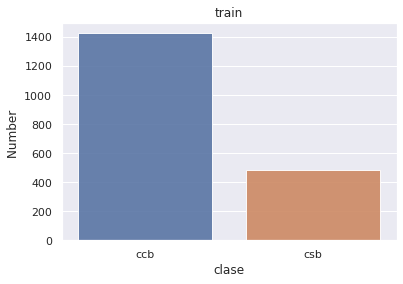

Fig1


In [4]:
print("objetos de clase: ", np.unique(df_train.clase.to_list()))

plotbar (df_train,'clase','train')
print("Fig1")

Podemos incrementar los datos de la clase minoitaria. Es **importante** hacer este procedimiento **solo con los datos de entrenamiento**, ya que las imagenes en para la prediccion podrian estar desbalanceadas en la vida real. Ademas, **debemos tener cuidado** si vamos a hacer un **upsampling a partir de escasos datos** ya que podria generar un **bias**. 

Random over-sampling:
ccb    1427
csb    1427
Name: clase, dtype: int64


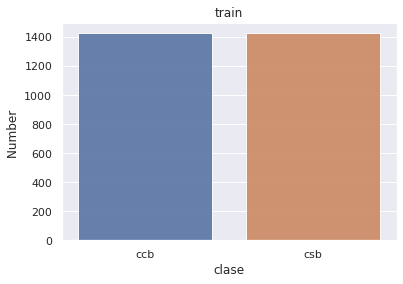

Fig.2


In [5]:

df_clase_ccb = df_train[df_train['clase'] == 'ccb']
df_clase_csb = df_train[df_train['clase'] == 'csb']


df_clase_csb_over = df_clase_csb.sample(df_clase_ccb.shape[0], replace=True)

df_train_balanced = pd.concat([df_clase_ccb, df_clase_csb_over], axis=0)

print('Random over-sampling:')
print(df_train_balanced.clase.value_counts())

plotbar (df_train_balanced,'clase','train')
print("Fig.2")

### Seleccion de features

Tambien podemos ver eliminar los features que no aportan informacion relevante. Este estudio fue realizado anteriormente y por un lado se determino que las variables ['xmin', 'xmax', 'ymin', 'ymax','width','height','bb_width','bb_height','filename','use','Unnamed: 0'] no aportan un valor significativo para la clasificacion 

TODO: agregar un pequeño resumen de porq las eliminamos

Por otro lado dejaremos el estudio de **videoname** para mas delane ya que puede ser importante para la determinacion del bias


In [6]:
df_train_balanced.head(2)

Unnamed: 0                              filename  width  height clase  \
75          75  Video1-frame-000086_single_box_0.jpg    640     360   ccb   
76          76  Video1-frame-000087_single_box_0.jpg    640     360   ccb   

    xmin  xmax  ymin  ymax    use  ...      2038      2039      2040  \
75    21    66    81   139  train  ...  0.375137  1.920585  0.546962   
76    16    53    84   145  train  ...  0.372351  2.056816  0.502349   

        2041      2042      2043      2044      2045      2046      2047  
75  1.109891  0.882858  0.104544  0.823586  0.228490  0.739440  0.143627  
76  0.339482  0.450890  0.196720  0.581477  0.105634  0.620929  0.158563  

[2 rows x 2064 columns]

In [7]:
drop_features = ['xmin', 'xmax', 'ymin', 'ymax','width','height','bb_width','bb_height','use','Unnamed: 0']
df_train_balanced = df_train_balanced.drop(drop_features, axis=1)
df_test = df_test.drop(drop_features, axis=1)

In [8]:
df_train_balanced.head(2)

filename clase videoname        ch_R  \
75  Video1-frame-000086_single_box_0.jpg   ccb    Video1  128.093872   
76  Video1-frame-000087_single_box_0.jpg   ccb    Video1  123.265839   

          ch_G        ch_B        0         1         2         3  ...  \
75  126.909584  113.631035  0.23332  0.153776  0.004623  0.360957  ...   
76  126.031456  113.494461  0.35788  0.241869  0.211136  0.452160  ...   

        2038      2039      2040      2041      2042      2043      2044  \
75  0.375137  1.920585  0.546962  1.109891  0.882858  0.104544  0.823586   
76  0.372351  2.056816  0.502349  0.339482  0.450890  0.196720  0.581477   

        2045      2046      2047  
75  0.228490  0.739440  0.143627  
76  0.105634  0.620929  0.158563  

[2 rows x 2054 columns]

In [9]:
from sklearn.preprocessing import MinMaxScaler

feat_cols = [str(col_name) for col_name in range(2048)] + ['ch_R', 'ch_G', 'ch_B']
X = df_train_balanced[feat_cols]
X_test = df_test[feat_cols]

y = df_train_balanced["clase"]
y_test = df_test["clase"]

def normalize_dataset(X, y):
    # Toma un dataframe de pandas para valores X y un dataframe objetivo y
    # Devuelve un dataframe con valores escalados a MinMaxScaler

    scaler = MinMaxScaler()
    scaler.fit(X)
    normalized_X_np = scaler.transform(X)

    normalized_X = pd.DataFrame(normalized_X_np, columns=X.keys(), index=X.index)
    
    return normalized_X


normalized_X = normalize_dataset(X, y)
normalized_X_test = normalize_dataset(X_test, y_test)

Usando el método chi2 para encontrar las variables mas significativas

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5) 
X_kbest = chi2_selector.fit_transform(normalized_X, y)

fit = chi2_selector.fit(normalized_X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(normalized_X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 50 best features
# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])


     features       Score
1088     1088  390.483001
170       170  387.401791
398       398  360.533990
1234     1234  357.871405
698       698  330.992617
1490     1490  330.567538
1165     1165  327.763677
38         38  320.508246
844       844  311.914552
1706     1706  303.080707
Original number of features: 2051
Reduced number of features: 5


<ipython-input-11-b2ac834c0e90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kbest_df["clase"] = y


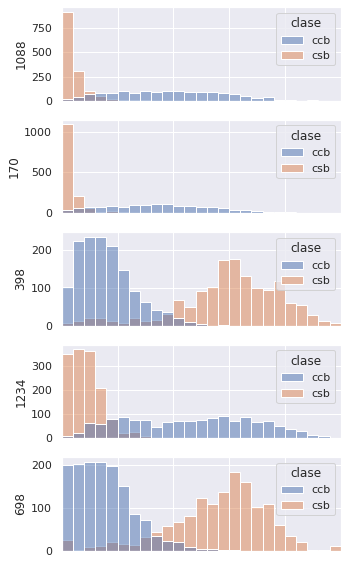

In [11]:
names = featureScores.nlargest(5, 'Score').features.values
names = list(names)
kbest_df = normalized_X[names]
kbest_df["clase"] = y
fig, axes = plt.subplots(5, 1, figsize=(5, 10))

for i, plot_feat in enumerate(names):
    
    sns.histplot(
        ax=axes[i],
        data=kbest_df[[plot_feat, "clase"]],
        x=kbest_df[plot_feat],
        bins=25,
        hue="clase",
        hue_order=["ccb", "csb"],
    )
    axes[i].set_xlim(0, 1)
    if i < 9:
        axes[i].set_xticklabels([])
    axes[i].set_xlabel("")
    axes[i].set_ylabel(plot_feat)
    

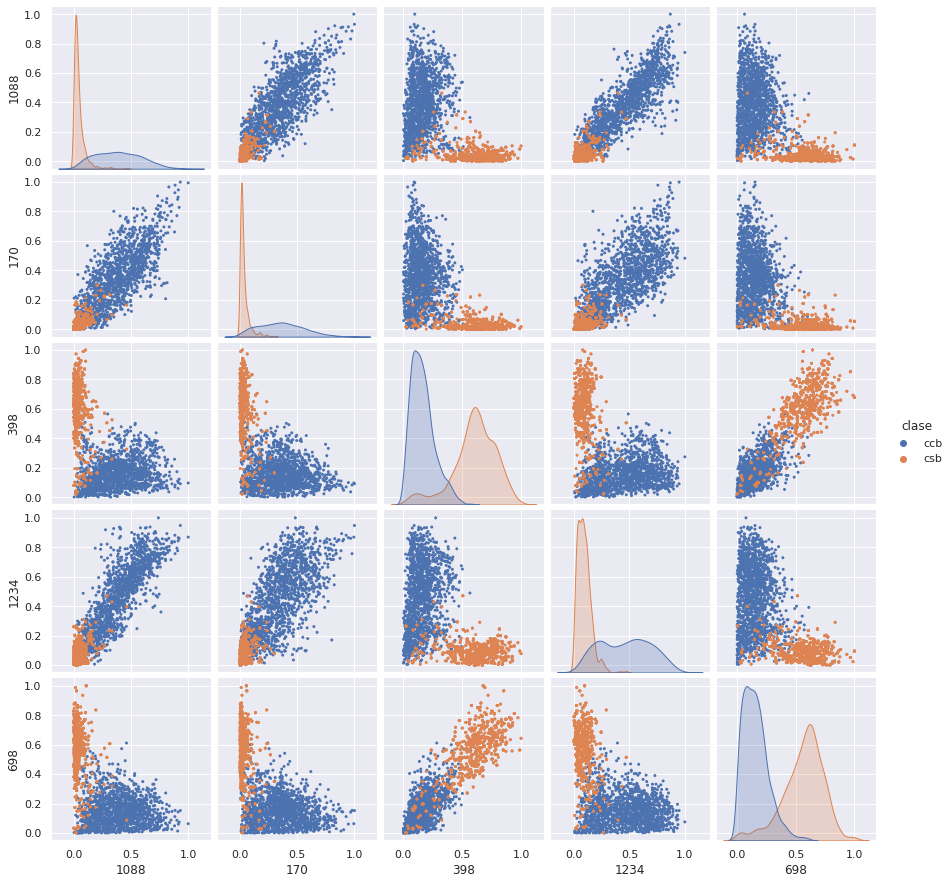

In [12]:
sns.pairplot(
    kbest_df,
    hue='clase',
    hue_order=['ccb', 'csb'],
    markers='.',
    plot_kws=dict(edgecolor="None",linewidth=1)
)

sns.despine()

### Estudio del bias

Recordemos que para estudiar el bias podemos ver la grafica N-1

In [13]:
df_ = kbest_df
df_["videoname"] = df_train_balanced["videoname"]
videos_names = np.unique(df_train_balanced.videoname.to_list())

def plot_features_n1(features, ax):
    first_run = True

    x_ticks_labels = []
    
    for feature in features:
        mean_ = []
        std_ = []

        for vi, video in enumerate(videos_names):
            df_n1= df_[df_['videoname'] != video]

            m = df_n1[feature].mean()
            s = df_n1[feature].std()

            mean_.append(m)
            std_.append(((s)**(1/2))/2)
            
            if first_run:
                x_ticks_labels.append(video)

        first_run = False
        x = np.arange(len(mean_))
        
        ax.errorbar(x, mean_, yerr=std_,  label=feature)
        ax.set_ylim(0,1)
        ax.set_ylabel('mean')
       
        ax.legend(loc='lower right')
        ax.set_xticks(x)
        ax.set_xticklabels(x_ticks_labels)
    
    return ax


fig, axs = plt.subplots(2, 1)
fig.set_figwidth(15)
fig.set_figheight(15)


k_best_features = names[0:3]
plot_features_n1(k_best_features, axs[0])



k_best_features = names[3:5]
plot_features_n1(k_best_features, axs[1])
plt.show()

<ipython-input-13-569805c8af44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["videoname"] = df_train_balanced["videoname"]


# Regresión


##### Regresión:

 * Hacer una gráfica que muestre su relación con la variable objetivo.
 * Instanciar una regresión lineal de scikit-learn, y entrenarla usando sólo el atributo seleccionado.
 * Calcular el error cuadrático medio para los conjuntos de entrenamiento y evaluación y grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación. 
 * Interpretar el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.  
 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# Encode de datos categoricos
encoding = {"clase": {"ccb": 1, "csb": 0}}
encoded_df  = kbest_df.replace(encoding)

reg_y = encoded_df["clase"]
encoded_y = reg_y
reg_X = encoded_df["170"]
reg_X = np.array(reg_X).reshape(-1, 1)

regr = LinearRegression().fit(reg_X, reg_y)

Usamos la libreria de sklearn para hacer una regresion lineal usando como variable el feature **170**

Coefficients: 
 [1.74375784]
Mean squared error: 0.14
Coefficient of determination: 0.21


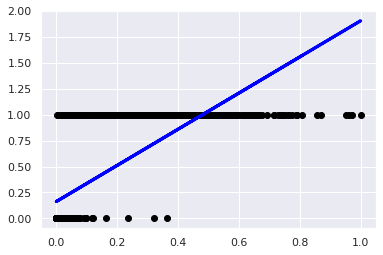

Fig 2.1


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

test_X = np.array(normalized_X_test["170"]).reshape(-1, 1)
test_y = df_test.replace(encoding)["clase"]
reg_y_pred = regr.predict(test_X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_y, reg_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, reg_y_pred))

# Plot outputs
plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, reg_y_pred, color='blue', linewidth=3)

plt.show()
print("Fig 2.1")

En la Figura 2.1 vemos los puntos del feature **170** para cada una de las clases **1 y 2** y en azul se muestra la regresion lineal, vemos que este no es un buen modelo para distinguir ccb y csb

Se podría usar un *threshold* alrededor de 0.1 para serparar las categorías, pero el error en este caso seguiría siendo elevado.

   
* Tomar pares de características y considerar una como regresora y la otra como objetivo o variable/característica a predecir y realizar una regresión lineal y varias polinomiales (hasta grado 5) para evaluar el grado del polinomio que mejor se ajusta a las predicciones.

In [17]:

df_R_kbest = df_train_balanced[['ch_R','170','1088','398','1234','698']]
df_R_kbest.head(2)

ch_R       170      1088       398      1234       698
75  128.093872  1.788954  2.351173  0.310823  1.824311  0.464476
76  123.265839  1.257566  1.322636  0.333566  1.696431  0.419962

##### Regresion lineal

Para este estudio consideramos ch_R y 170 como pares de caracteristicas

In [18]:

reg_y = df_R_kbest["ch_R"]
reg_y = np.array(reg_y).reshape(-1, 1)
reg_X = df_R_kbest["170"]
reg_X = np.array(reg_X).reshape(-1, 1)

regr = LinearRegression().fit(reg_X, reg_y)

test_X = np.array(df_test["170"]).reshape(-1, 1)
test_y = np.array(df_test["ch_R"]).reshape(-1, 1)
reg_y_pred = regr.predict(test_X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_y, reg_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, reg_y_pred))

# Plot outputs
plt.scatter(test_X, test_y,  color='black')
plt.plot(test_X, reg_y_pred, color='blue', linewidth=3)

plt.show()
print("Fig 2.2")

Coefficients: 
 [[-12.13961812]]
Mean squared error: 1291.74
Coefficient of determination: 0.01


Fig 2.2


Consideramos como variable el canal rojo **ch_R** y el feature **170**. en este caso el modelo muestra mejores resultados, ya que no se intenta separar entre clases, sino predecir valores de un rango continuo 

##### Regresion polinomial

De igual modo, seleccionamos los mismos featues para hacer la regresion polinomial para luego comparar

Para grado 1: Error en train 1252.46 , Error en test 1291.74
Para grado 2: Error en train 1225.87 , Error en test 1292.73
Para grado 3: Error en train 1190.93 , Error en test 1292.49
Para grado 4: Error en train 1170.71 , Error en test 1305.58
Para grado 5: Error en train 1168.18 , Error en test 1310.27
x_start 0.0
x_end 3.000843524932861


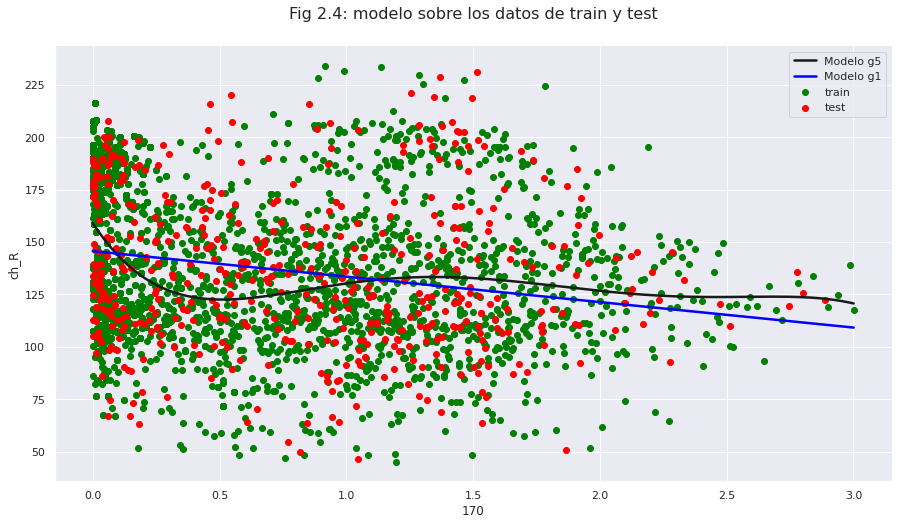

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


reg_p_y = df_R_kbest["ch_R"]
reg_p_y = np.array(reg_p_y).reshape(-1, 1)
reg_p_X = df_R_kbest["170"]
reg_p_X = np.array(reg_p_X).reshape(-1, 1)

test_p_X = np.array(df_test["170"]).reshape(-1, 1)
test_p_y = np.array(df_test["ch_R"]).reshape(-1, 1)

train_errors = []
test_errors = []
degrees = range(1,6)


for degree in degrees:
  pf = PolynomialFeatures(degree)
  lr = LinearRegression(fit_intercept=False)
  model = make_pipeline(pf, lr)
  model.fit(reg_p_X, reg_p_y)
 
  y_train_pred = model.predict(reg_p_X)
  y_test_pred = model.predict(test_p_X)
  train_error = mean_squared_error(reg_p_y, y_train_pred)
 
  train_errors.append(train_error)
  test_error = mean_squared_error(test_p_y, y_test_pred)

  test_errors.append(test_error)
  print(f'Para grado {degree}: Error en train {train_error.round(2)} , Error en test {test_error.round(2)}')




fig, axes = plt.subplots(figsize=(14,6))
c = sns.color_palette("Set2", 3)
sns.lineplot(x=degrees, y=train_errors, label='train', lw=2.5, color=c[0])
sns.lineplot(x=degrees, y=test_errors, label='test', lw=2.5, color=c[1])
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.tick_params(axis='both', which='major', labelsize=15)
axes.tick_params(axis='both', which='minor', labelsize=15)
plt.xlabel('Grado polinomio', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.title('Fig 2.3: Grado de polinomio vs error en train/test', fontsize=16, y=1.05);


#best model
pf_1 = PolynomialFeatures(1)
lr_1 = LinearRegression(fit_intercept=False)
model_1 = make_pipeline(pf_1, lr_1)
model_1.fit(reg_p_X, reg_p_y) 
 



fig, axes = plt.subplots(figsize=(15,8))
c = sns.color_palette("Set2", 3)

x_start = min(np.min(reg_p_X), np.min(test_p_X))
x_end = max(np.max(reg_p_X), np.max(test_p_X))

print("x_start",x_start)
print("x_end",x_end)
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.scatter(reg_p_X, reg_p_y,  color='green',label="train")
plt.scatter(test_p_X, test_p_y,  color='red',label="test")
sns.lineplot(x=x.ravel(), y=model.predict(x.reshape(-1, 1)).ravel(), label='Modelo g5', lw=2.5, color='k')
sns.lineplot(x=x.ravel(), y=model_1.predict(x.reshape(-1, 1)).ravel(), label='Modelo g1', lw=2.5, color='blue')
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.xlabel('170')
plt.ylabel('ch_R')
plt.title('Fig 2.4: modelo sobre los datos de train y test', fontsize=16, y=1.05);


**Obs** Podemos ver que tanto el polinomio de grado 1 (lineal) como el de grado 5 , da resultados similares en el dataset de testeo

 * Luego realizar la búsqueda de los mejores hiperparámetros utilizando GridSearchCV en el conjunto Train, con RMSE o análoga como medida de calidad de ajuste.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


y_train = df_train_balanced["ch_R"]
x_train = df_train_balanced["170"]

y_train = np.array(y_train).reshape(-1, 1)
x_train = np.array(x_train).reshape(-1, 1)

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {
    'polynomialfeatures__degree': np.arange(5),
    'linearregression__fit_intercept': [True, False],
    'linearregression__normalize': [True, False]
}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')
poly_grid.fit(x_train, y_train)

results = poly_grid.cv_results_
df_r = pd.DataFrame(results)


In [21]:
df_r.sort_values('rank_test_score')[:15]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       0.000441      0.000005         0.000182        0.000016   
14       0.000448      0.000022         0.000176        0.000001   
4        0.000597      0.000022         0.000193        0.000005   
9        0.000501      0.000004         0.000181        0.000004   
18       0.000425      0.000028         0.000175        0.000003   
13       0.000416      0.000002         0.000175        0.000003   
3        0.000572      0.000016         0.000190        0.000002   
8        0.000497      0.000016         0.000183        0.000004   
2        0.000540      0.000007         0.000194        0.000022   
7        0.000478      0.000014         0.000182        0.000002   
12       0.000404      0.000030         0.000172        0.000004   
17       0.000393      0.000005         0.000177        0.000018   
6        0.000453      0.000015         0.000177        0.000003   
1        0.000530      0.000016         0.000185        0.000007   
11       0.000371      0.000015         0.000165        0.000003   

   param_linearregression__fit_intercept param_linearregression__normalize  \
19                                 False                             False   
14                                 False                              True   
4                                   True                              True   
9                                   True                             False   
18                                 False                             False   
13                                 False                              True   
3                                   True                              True   
8                                   True                             False   
2                                   True                              True   
7                                   True                             False   
12                                 False                              True   
17                                 False                             False   
6                                   True                             False   
1                                   True                              True   
11                                 False                              True   

   param_polynomialfeatures__degree  \
19                                4   
14                                4   
4                                 4   
9                                 4   
18                                3   
13                                3   
3                                 3   
8                                 3   
2                                 2   
7                                 2   
12                                2   
17                                2   
6                                 1   
1                                 1   
11                                1   

                                               params  split0_test_score  \
19  {'linearregression__fit_intercept': False, 'li...       -1075.484032   
14  {'linearregression__fit_intercept': False, 'li...       -1075.484032   
4   {'linearregression__fit_intercept': True, 'lin...       -1075.484032   
9   {'linearregression__fit_intercept': True, 'lin...       -1075.484032   
18  {'linearregression__fit_intercept': False, 'li...       -1279.837031   
13  {'linearregression__fit_intercept': False, 'li...       -1279.837031   
3   {'linearregression__fit_intercept': True, 'lin...       -1279.837031   
8   {'linearregression__fit_intercept': True, 'lin...       -1279.837031   
2   {'linearregression__fit_intercept': True, 'lin...       -1053.802065   
7   {'linearregression__fit_intercept': True, 'lin...       -1053.802065   
12  {'linearregression__fit_intercept': False, 'li...       -1053.802065   
17  {'linearregression__fit_intercept': False, 'li...       -1053.802065   
6   {'linearregression__fit_intercept': True, 'lin...


    

 * Una vez definidos los hiperparámetros (encontrados en la búsqueda del item anterior. Evaluar el modelo ajustado utilizando el conjunto Test, con la medida (o las medidas) que crea adecuada.

In [22]:
poly_grid.best_params_


{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [23]:
y_train_pred = poly_grid.predict(x_train)
y_test_pred = poly_grid.predict(test_p_X)
train_error = mean_squared_error(reg_p_y, y_train_pred)

train_errors.append(train_error)
test_error = mean_squared_error(test_p_y, y_test_pred)

test_errors.append(test_error)
print(f'Para grado {degree}: Error en train {train_error.round(2)} , Error en test {test_error.round(2)}')


fig, axes = plt.subplots(figsize=(15,8))
c = sns.color_palette("Set2", 3)

x_start = min(np.min(reg_p_X), np.min(test_p_X))
x_end = max(np.max(reg_p_X), np.max(test_p_X))

print("x_start",x_start)
print("x_end",x_end)
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.scatter(reg_p_X, reg_p_y,  color='green',label="train")
plt.scatter(test_p_X, test_p_y,  color='red',label="test")
sns.lineplot(x=x.ravel(), y=poly_grid.predict(x.reshape(-1, 1)).ravel(), label='Modelo g4', lw=2.5, color='k')

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.xlabel('170')
plt.ylabel('ch_R')
plt.title('Fig 2.4: modelo sobre los datos de train y test', fontsize=16, y=1.05);


Para grado 5: Error en train 1170.71 , Error en test 1305.58
x_start 0.0
x_end 3.000843524932861


# Clasificacion


 Seleccionar de a pares de características en el conjunto Train para clasificación binaria: csb -ccb.   
   Primero con los hiperparámetros por defecto y luego ir cambiándolos un poco implementar los algoritmos de (del paquete sklearn):
   * Perceptrón, 
   * SGD 
   * Árboles de Decisión 

   Utilizar GridSearchCV para explorar las diferentes combinaciones de hiperparámetros. Realizar las gráficas correspondientes de ROC, PR y las de froteras de desición. 
   
   * ¿Puedo determinar el video que originó la imagen? Aplicar clasificación multiclase. 
   * Realizar una represtanción matricial con los resultados: Matriz de confusión.

In [24]:
import utils
from sklearn.metrics import f1_score, roc_curve, precision_recall_curve, confusion_matrix

def plot_model_metrics(fitted_model, X, y):
    fig, axes = plt.subplots(2, 2, figsize=(13, 10))

    y_pred = model.predict(X)
    f1_score_result = f1_score(y, y_pred)
    print(f"f1 score: {f1_score_result}")
    
    # Boundries
    utils.plot_decision_boundary(model.predict, X, y, axes[0, 0])
    
    # ROC curve
    fpr, tpr, threshold = roc_curve(y, y_pred, drop_intermediate=True)
    axes[0, 1].set_title("Curva ROC")
    axes[0, 1].plot(1.0 - fpr, tpr, color="red")
    axes[0, 1].scatter(1.0 - fpr, tpr, color="red")
    axes[0, 1].set_xlabel("true negative rate")
    axes[0, 1].set_ylabel("true positive rate")
    
    # Precision / Recall
    precision, recall, threshold = precision_recall_curve(y, y_pred)
    axes[1, 1].set_title("Precision / Recall")
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1.1)
    axes[1, 1].plot(recall, precision, color="red")
    axes[1, 1].scatter(recall, precision, color="red")
    axes[1, 1].set_xlabel("recall")
    axes[1, 1].set_ylabel("precision")
    
    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    utils.plot_confusion_matrix(cm, ["csb", "ccb"], ax=axes[1, 0])
    plt.show()

## Algoritmo Perceptrón

In [25]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=1423)
perc_X = normalized_X[["1088", "698"]].to_numpy()
perc_X_test = normalized_X_test[["1088", "698"]].to_numpy()
encoding = {"clase": {"csb": -1, "ccb": 1}}
encoded_y = df_train_balanced[["clase"]].replace(encoding)["clase"].to_numpy()
encoded_y_test = df_test[["clase"]].replace(encoding)["clase"].to_numpy()
model = clf.fit(perc_X, encoded_y)
clf.score(perc_X_test, encoded_y_test)


0.9818181818181818

f1 score: 0.988173455978975


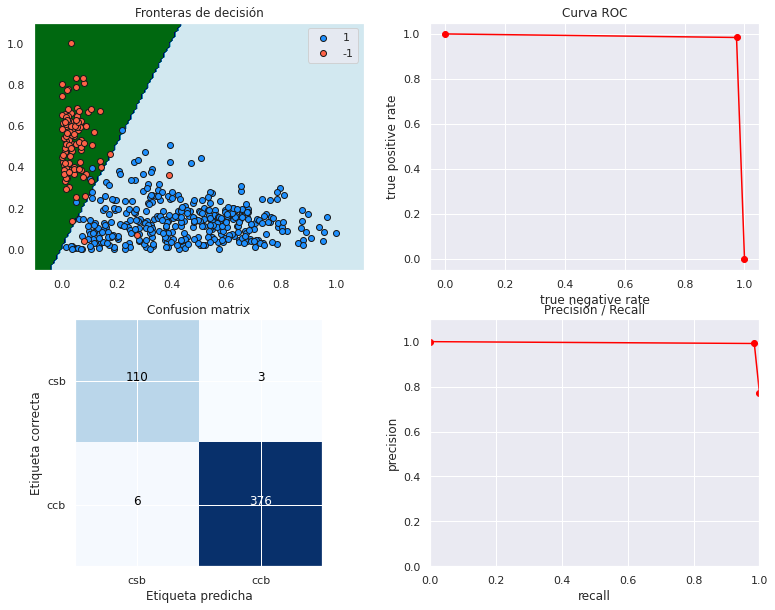

In [26]:
plot_model_metrics(model, perc_X_test, encoded_y_test)

Para el caso de estas dos variables, vemos a simple vista que existe una buena separabilidad lineal. El algoritmo de perceptrón hace un buent trabajo diferenciando las clases en este caso.

In [27]:
hparams = {
    "penalty": ["l1", "l2", "elasticnet"],
    "alpha": [0.0001, 0.001, 0.00001],
    "l1_ratio": [0.15, 0.01, 0.4]
}
clf = GridSearchCV(Perceptron(random_state=1423), hparams, scoring='accuracy', cv=5)
model = clf.fit(perc_X, encoded_y)
clf.score(perc_X_test, encoded_y_test)

0.9757575757575757

In [28]:
clf.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.01, 'penalty': 'elasticnet'}

f1 score: 0.9841688654353562


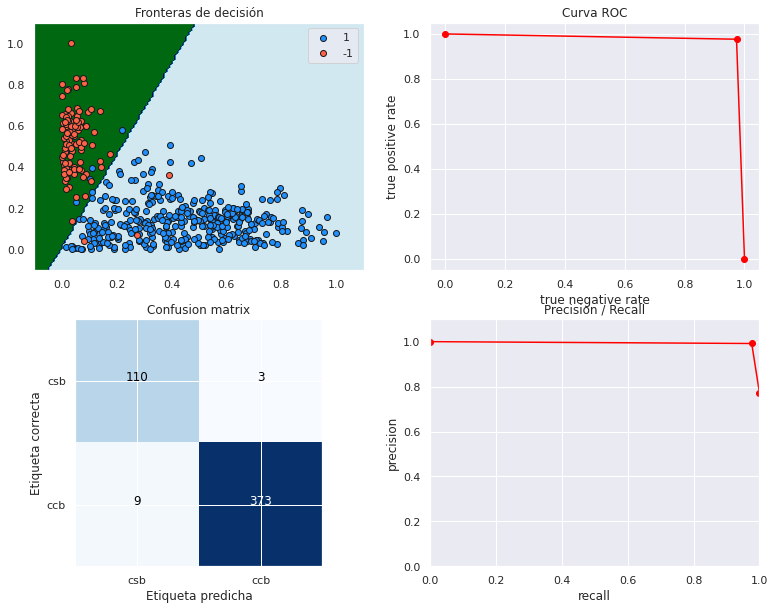

In [29]:
plot_model_metrics(model, perc_X_test, encoded_y_test)

En este caso, vemos que los mejores parámetros coinciden con los parámetros por defecto. Por lo cual, los resultados son muy similares.

## Stochastic Gradient Descent (SGD)

In [30]:
sgd_X = normalized_X[["398", "698"]].to_numpy()
sgd_X_test = normalized_X_test[["398", "698"]].to_numpy()
encoding = {"clase": {"csb": -1, "ccb": 1}}
encoded_y = df_train_balanced[["clase"]].replace(encoding)["clase"].to_numpy()
encoded_y_test = df_test[["clase"]].replace(encoding)["clase"].to_numpy()

In [31]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=1423)
model = clf.fit(sgd_X, encoded_y)
clf.score(sgd_X_test, encoded_y_test)

0.9515151515151515

f1 score: 0.9685039370078741


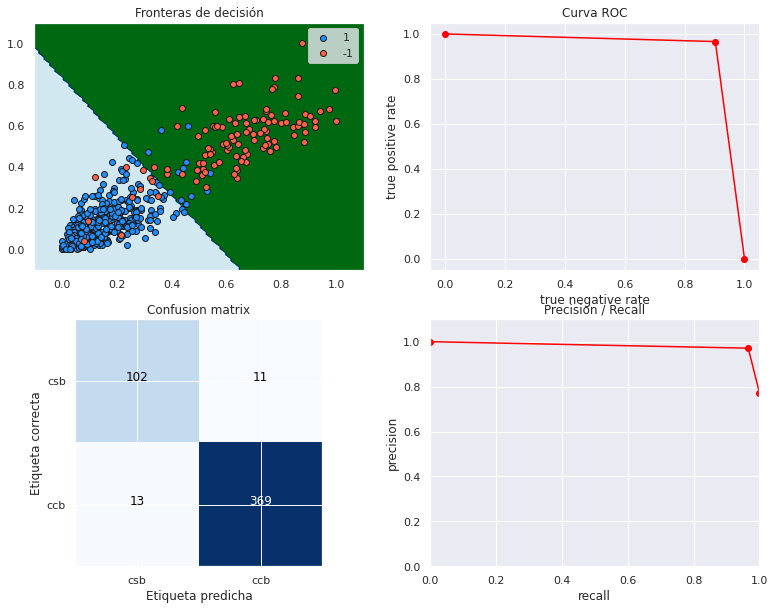

In [32]:
plot_model_metrics(model, sgd_X_test, encoded_y_test)

In [33]:
hparams = {
    "loss": ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"],
    "penalty": ["l1", "l2", "elasticnet"],
    "alpha": [0.0001, 0.001, 0.00001],
    "l1_ratio": [0.15, 0.01, 0.4]
}
clf = GridSearchCV(SGDClassifier(random_state=1423, max_iter=10000), hparams, scoring='accuracy', cv=5, refit=True, n_jobs=12)
model = clf.fit(sgd_X, encoded_y)
clf.score(sgd_X_test, encoded_y_test)

0.9555555555555556

In [34]:
clf.best_params_

{'alpha': 0.001, 'l1_ratio': 0.15, 'loss': 'hinge', 'penalty': 'l1'}

f1 score: 0.9712041884816754


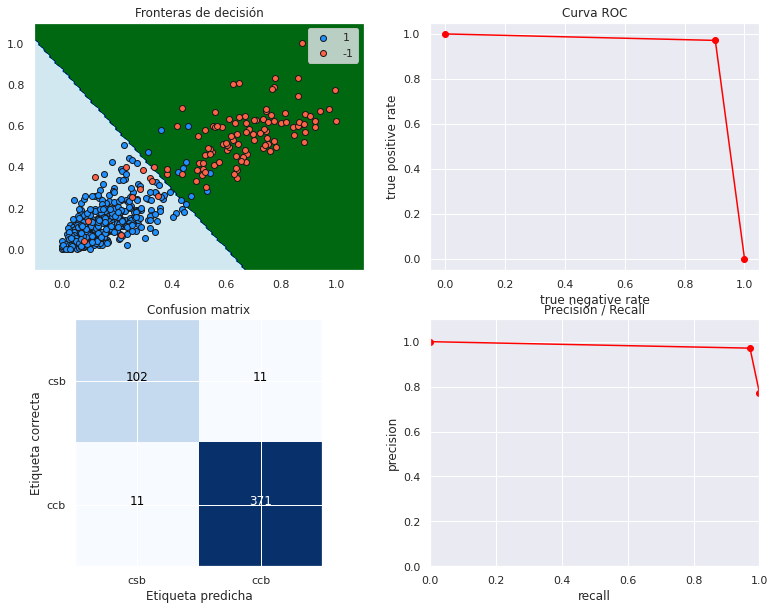

In [35]:
plot_model_metrics(model, sgd_X_test, encoded_y_test)

Nuevamente, encontramos que los parámetros descubiertos por Grid Search, son muy similares a los parámetros por defecto del modelo, brindando resultados muy cercanos.

In [36]:
clf = SGDClassifier(random_state=1423, loss="log", alpha=0.01, max_iter=1000)
model = clf.fit(sgd_X, encoded_y)

Reentrenamos con loss=log para obtener resultados probabilísticos.

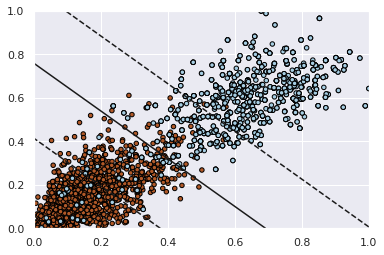

In [37]:
xx = np.linspace(0, 1, 10)
yy = np.linspace(0, 1, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(sgd_X[:, 0], sgd_X[:, 1], c=encoded_y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()


f1 score: 0.9738903394255874


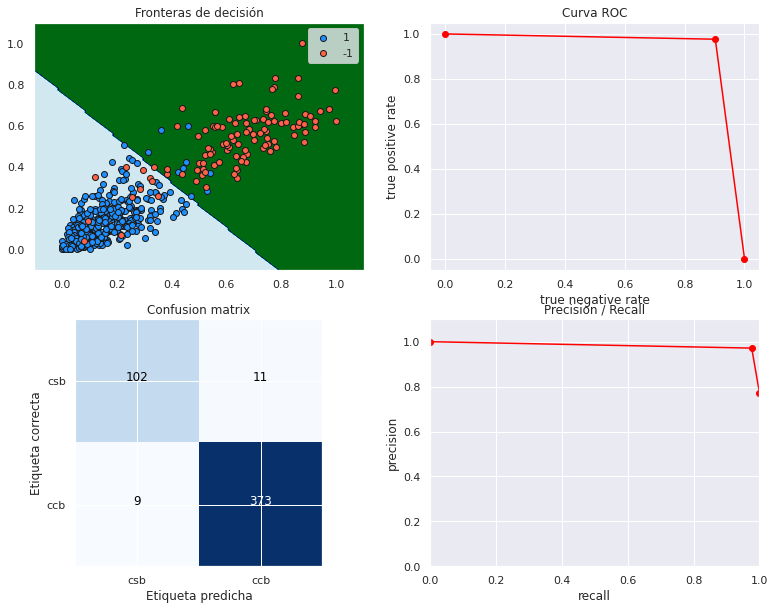

In [38]:
plot_model_metrics(model, sgd_X_test, encoded_y_test)

En este caso, seleccionamos dos variables diferentes, pero que también aparentan tener una buena separabilidad lineal. Podemos ver como el método de SGD logra encontrar un hiperplano apropiado para clasificar correctamente gran parte del conjunto de test.

In [39]:
predicted = model.predict(sgd_X_test)
predicted_probs = model.predict_proba(sgd_X_test)

In [40]:
true_positives = []
true_negatives = []
false_positives = []
false_negatives = []
for i, cls in enumerate(encoded_y_test):
    if predicted[i] != cls:
        if predicted[i] == 1:
            false_positives.append((i, df_test["filename"][i], predicted_probs[i][1]))
        else:
            false_negatives.append((i, df_test["filename"][i], predicted_probs[i][0]))
    else:
        if cls == 1:
            true_positives.append((i, df_test["filename"][i], predicted_probs[i][1]))
        else:
            true_negatives.append((i, df_test["filename"][i], predicted_probs[i][0]))

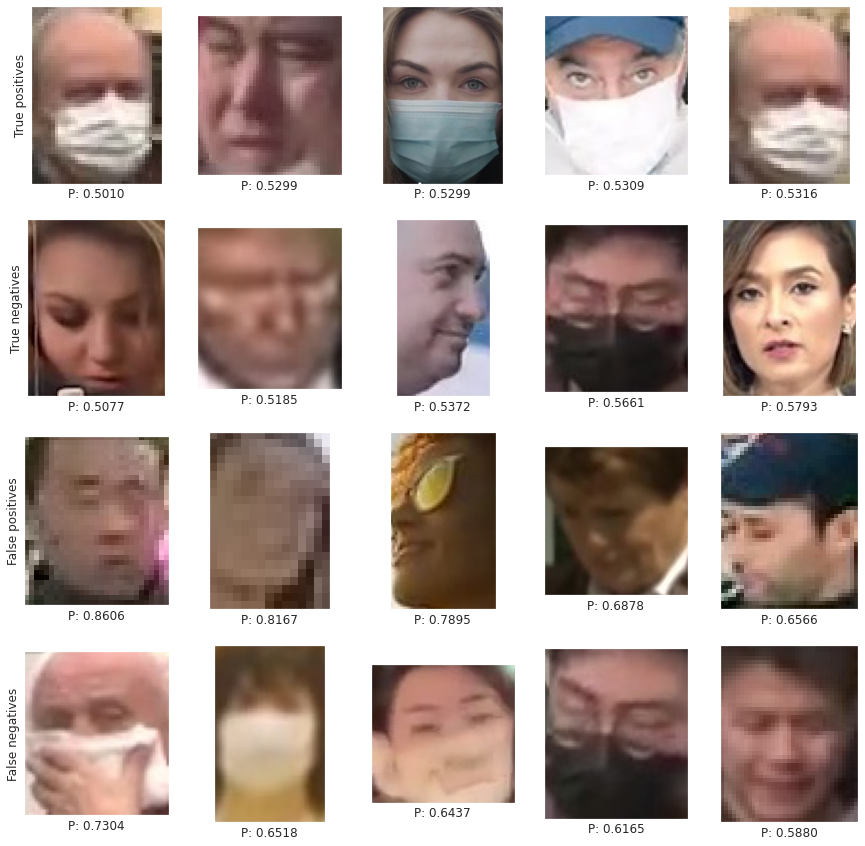

In [41]:
import matplotlib.image as mpimg

fig, axes = plt.subplots(4, 5, figsize=(15, 15))
cropped_location = "dataset/crop/dataSet_test_cropp/"
groups = [true_positives, true_negatives, false_positives, false_negatives]
dtype = [("index", "S10"), ("videoname", np.unicode_, 50), ("class_prob", float)]

groups_labels = ["True positives", "True negatives", "False positives", "False negatives"]
for i, group in enumerate(groups):
    np_ar = np.array(group, dtype=dtype)
    np_ar.sort(order="class_prob")
    if i in [2, 3]:
        np_ar = np.flip(np_ar)
    for j in range(5):
        ax = axes[i, j]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(f"P: {np_ar[j][2]:.4f}")
        if j == 0:
            ax.set_ylabel(groups_labels[i])
        image = mpimg.imread(cropped_location + np_ar[j][1])
        ax.imshow(image)
plt.show()

### Entrenando SGD con todas las features del modelo

In [42]:
sgd_X_all_feats = normalized_X.to_numpy()
sgd_X_test_all_feats = normalized_X_test.to_numpy()
clf = SGDClassifier(loss="log", alpha=0.01, max_iter=200)
model = clf.fit(sgd_X_all_feats, encoded_y)

In [43]:
print(f"model score: {clf.score(sgd_X_test_all_feats, encoded_y_test)}")
print(f"f1 score: {f1_score(clf.predict(sgd_X_test_all_feats), encoded_y_test)}")

model score: 0.9878787878787879
f1 score: 0.9921259842519685


Al usar todos los features del input, podemos ver que el modelo de SGD realiza un excelente trabajo de clasificación de las etiquetas con las que fue entrenado.

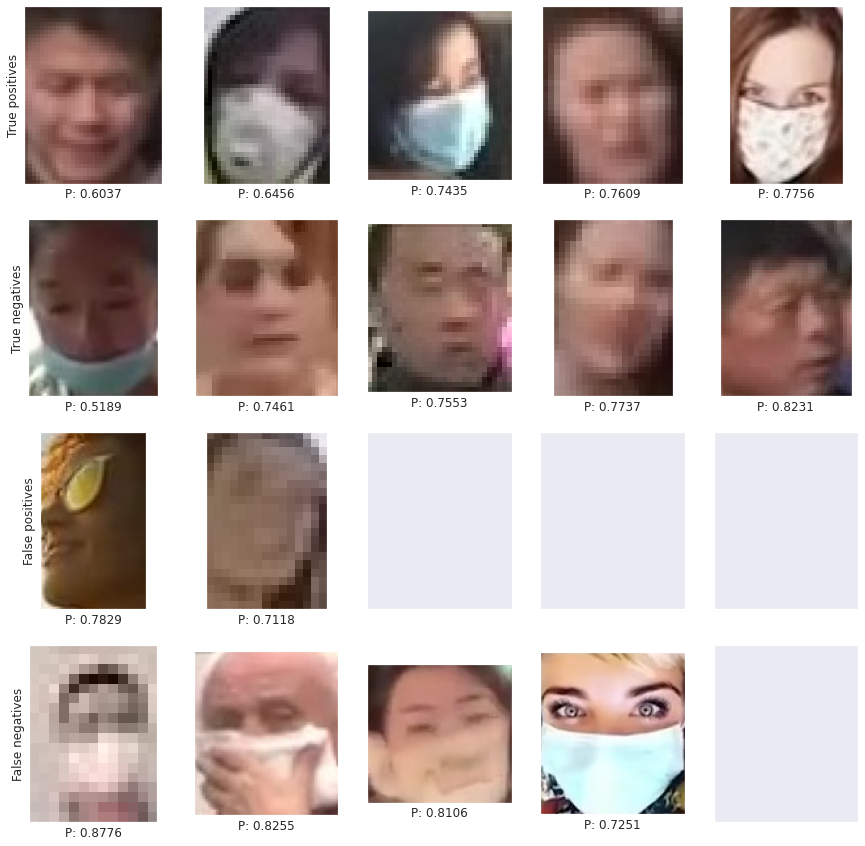

In [44]:
predicted = model.predict(sgd_X_test_all_feats)
predicted_probs = model.predict_proba(sgd_X_test_all_feats)

true_positives = []
true_negatives = []
false_positives = []
false_negatives = []
for i, cls in enumerate(encoded_y_test):
    if predicted[i] != cls:
        if predicted[i] == 1:
            false_positives.append((i, df_test["filename"][i], predicted_probs[i][1]))
        else:
            false_negatives.append((i, df_test["filename"][i], predicted_probs[i][0]))
    else:
        if cls == 1:
            true_positives.append((i, df_test["filename"][i], predicted_probs[i][1]))
        else:
            true_negatives.append((i, df_test["filename"][i], predicted_probs[i][0]))

fig, axes = plt.subplots(4, 5, figsize=(15, 15))
cropped_location = "dataset/crop/dataSet_test_cropp/"
groups = [true_positives, true_negatives, false_positives, false_negatives]
dtype = [("index", "S10"), ("videoname", np.unicode_, 50), ("class_prob", float)]

groups_labels = ["True positives", "True negatives", "False positives", "False negatives"]
for i, group in enumerate(groups):
    np_ar = np.array(group, dtype=dtype)
    np_ar.sort(order="class_prob")
    if i in [2, 3]:
        np_ar = np.flip(np_ar)
    for j in range(5):
        ax = axes[i, j]
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(groups_labels[i])
        if len(np_ar) > j:
            ax.set_xlabel(f"P: {np_ar[j][2]:.4f}")
            image = mpimg.imread(cropped_location + np_ar[j][1])
            ax.imshow(image)
plt.show()

En el gráfico anterior podemos ver ejemplos de muestras del conjunto de test clasificadas correctamente e incorrectamente por el modelo resultante. Los ejemplos de muestras clasificadas correctamente, están ordenados de acuerdo a la menor probabilidad, y los ejemplos de muestras mal clasificadas, están ordenados de acuerdo a la mayor probabilidad.

En este caso, el modelo no produjo falsos positivos, y pocos falsos negativos. Entre los falsos negativos, podemos observar algunos ejemplos ruidosos y otros difíciles de catalogar, inclusive para un humano.

## Árboles de decisión

primero hacemos un estudio con los parametros dados por default del DecisionTreeClassifier

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1427
           1       1.00      1.00      1.00      1427

    accuracy                           1.00      2854
   macro avg       1.00      1.00      1.00      2854
weighted avg       1.00      1.00      1.00      2854



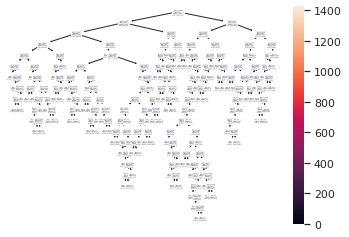

In [45]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df_ar_x = df_train_balanced[['170','1088']]
df_ar_y = df_train_balanced.clase

tree_X = normalized_X[["170", "1088"]].to_numpy()
tree_X_test = normalized_X_test[["170", "1088"]].to_numpy()

clf_tree = DecisionTreeClassifier(random_state=100)
model = clf_tree.fit(tree_X, encoded_y)

y_pred_train = clf_tree.predict(tree_X)
sns.heatmap(confusion_matrix(encoded_y, y_pred_train), annot=True, fmt='g')
print(classification_report(encoded_y, y_pred_train))

from sklearn import tree
tree.plot_tree(clf_tree);

f1 score: 1.0


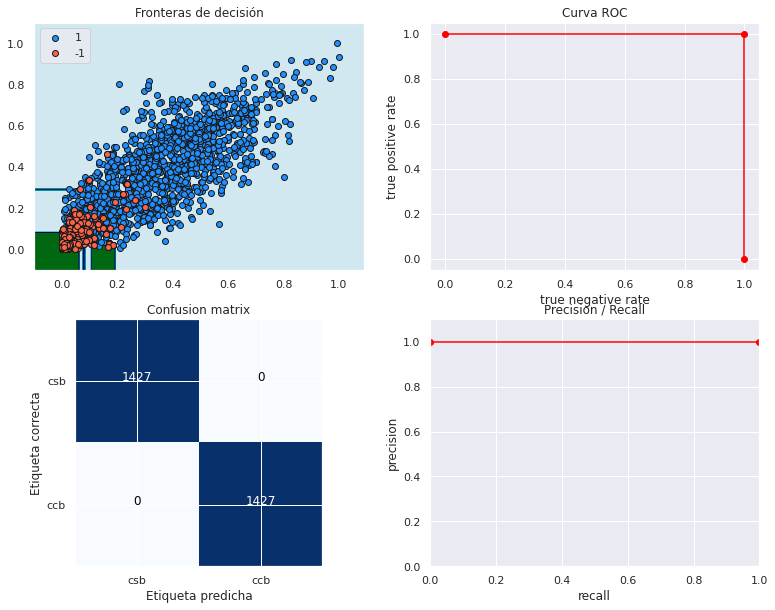

In [46]:
plot_model_metrics(y_pred_train, tree_X, encoded_y)

Es notable como, en el gráfico de fronteras de decisión, los *samples* que se encuentran fuera de la sección de mínima entropía, son sobre-ajustados por el algoritmo. También podemos ver como, para el conjunto de entrenamiento y sin límites que prevengan el *overfitting*, el árbol no "comete errores" sobre el conjunto de training.

f1 score: 0.9499358151476252


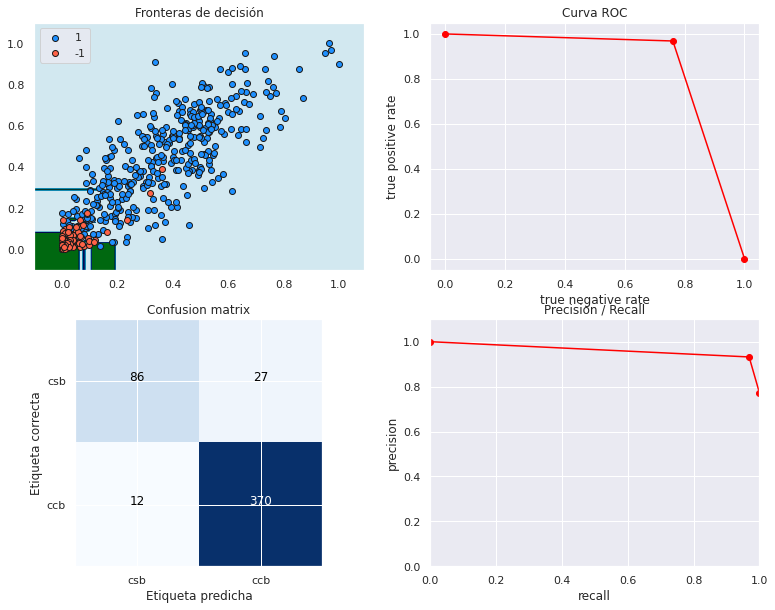

In [47]:
plot_model_metrics(y_pred_train, tree_X_test, encoded_y_test)

### Árboles de decisión con grid search

Generamos una grid search para explorar los parametros optimos del modelo

In [48]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,22],
    'min_samples_leaf': [1, 5, 10, 15],
    }

cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid, scoring='accuracy', cv=5)
cv_dt.fit(tree_X, encoded_y)

results = cv_dt.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_criterion param_max_depth param_min_samples_leaf  mean_test_score  \
12            gini              20                      1         0.959355   
16            gini              22                      1         0.959355   
8             gini              15                      1         0.958655   
32         entropy              20                      1         0.958302   
36         entropy              22                      1         0.957952   
28         entropy              15                      1         0.955150   
4             gini              10                      1         0.953047   
24         entropy              10                      1         0.948842   
38         entropy              22                     10         0.942885   
34         entropy              20                     10         0.942885   
26         entropy              10                     10         0.942885   
30         entropy              15                     10         0.942885   
37         entropy              22                      5         0.938681   
33         entropy              20                      5         0.938681   
29         entropy              15                      5         0.938681   
27         entropy              10                     15         0.938326   
39         entropy              22                     15         0.938326   
35         entropy              20                     15         0.938326   
31         entropy              15                     15         0.938326   
17            gini              22                      5         0.937981   
9             gini              15                      5         0.937981   
13            gini              20                      5         0.937981   
19            gini              22                     15         0.937976   
15            gini              20                     15         0.937976   
11            gini              15                     15         0.937976   
7             gini              10                     15         0.937976   
25         entropy              10                      5         0.937279   
10            gini              15                     10         0.936224   
18            gini              22                     10         0.936224   
14            gini              20                     10         0.936224   
6             gini              10                     10         0.936224   
20         entropy               5                      1         0.935876   
5             gini              10                      5         0.935177   
0             gini               5                      1         0.934474   
3             gini               5                     15         0.933772   
22         entropy               5                     10         0.933425   
21         entropy               5                      5         0.933424   
1             gini               5                      5         0.932373   
23         entropy               5                     15         0.929919   
2             gini               5                     10         0.929918   

    std_test_score  rank_test_score  
12        0.008169                1  
16        0.008169                1  
8         0.009881                3  
32        0.009237                4  
36        0.009210                5  
28        0.011002                6  
4         0.006218                7  
24        0.010364                8  
38        0.009896                9  
34        0.009896                9  
26        0.009896                9  
30        0.009896                9  
37        0.007104               13  
33        0.007104               13  
29        0.007104               13  
27        0.014743               16  
39        0.014743               16  
35        0.014743               16  
31        0.014743               16  
17        0.005505               20  
9     

In [49]:
cv_dt.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}

In [50]:
clf_tree_best = DecisionTreeClassifier(random_state=100, **cv_dt.best_params_)
model_best = clf_tree_best.fit(tree_X, encoded_y)

              precision    recall  f1-score   support

          -1       0.88      0.76      0.82       113
           1       0.93      0.97      0.95       382

    accuracy                           0.92       495
   macro avg       0.90      0.86      0.88       495
weighted avg       0.92      0.92      0.92       495



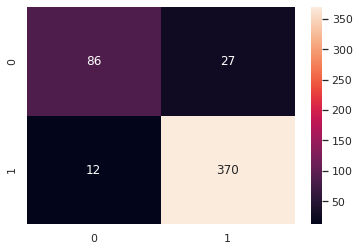

In [51]:
# Conjunto de test
y_pred_test = clf_tree_best.predict(tree_X_test)
sns.heatmap(confusion_matrix(encoded_y_test, y_pred_test), annot= True, fmt='g')
print(classification_report(encoded_y_test, y_pred_test))

f1 score: 0.9499358151476252


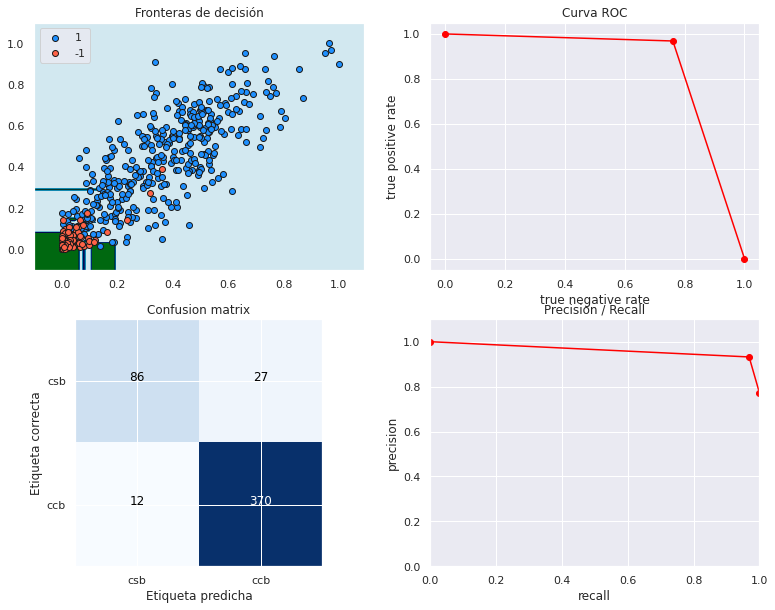

In [52]:
plot_model_metrics(y_pred_test, tree_X_test, encoded_y_test)

Vemos que los resultados son similares. Esto se puede entender porque los parámetros óptimos encontrados por grid search, son similares a los valores por defecto del modelo de scikit learn.

# Predicciones de etiquetas múltiples

In [53]:
df_train_balanced.head(2)

filename clase videoname        ch_R  \
75  Video1-frame-000086_single_box_0.jpg   ccb    Video1  128.093872   
76  Video1-frame-000087_single_box_0.jpg   ccb    Video1  123.265839   

          ch_G        ch_B        0         1         2         3  ...  \
75  126.909584  113.631035  0.23332  0.153776  0.004623  0.360957  ...   
76  126.031456  113.494461  0.35788  0.241869  0.211136  0.452160  ...   

        2038      2039      2040      2041      2042      2043      2044  \
75  0.375137  1.920585  0.546962  1.109891  0.882858  0.104544  0.823586   
76  0.372351  2.056816  0.502349  0.339482  0.450890  0.196720  0.581477   

        2045      2046      2047  
75  0.228490  0.739440  0.143627  
76  0.105634  0.620929  0.158563  

[2 rows x 2054 columns]

In [54]:
from sklearn.preprocessing import MinMaxScaler

y_train = df_train_balanced["videoname"]
y_test = df_test["videoname"]

X_train = df_train_balanced.drop(['videoname','clase','filename'],axis=1)
X_test  = df_test.drop(['videoname','clase','filename'],axis=1)

normalized_X_train = normalize_dataset(X_train, y_train)
normalized_X_test = normalize_dataset(X_test, y_test)

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5) 
X_kbest_ = chi2_selector.fit_transform(normalized_X_train, y_train)

fit = chi2_selector.fit(normalized_X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(normalized_X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features', 'Score']  #naming the dataframe columns
print("Score de cada feature seleccionado")
print(featureScores.nlargest(10,'Score'))  #print 50 best features
# Show results
print('Original number of features:', normalized_X_train.shape[1])
print('Reduced number of features:', X_kbest_.shape[1])


Score de cada feature seleccionado
     features       Score
972       972  247.399857
1210     1210  237.642223
564       564  225.722382
779       779  217.820201
135       135  208.485993
838       838  203.439190
633       633  189.528712
1042     1042  187.709488
1609     1609  182.427767
28         28  176.031181
Original number of features: 2051
Reduced number of features: 5


<ipython-input-56-f793a48e210d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kbest_df["videoname"] = y_train


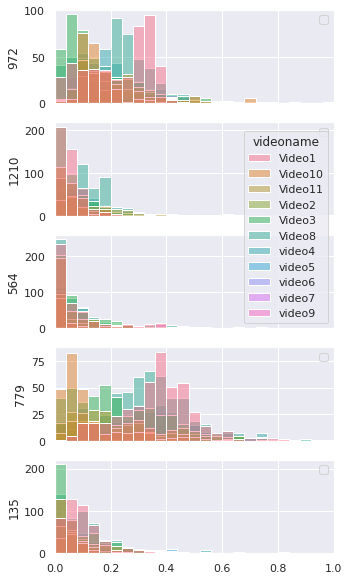

In [56]:
kbest_names = featureScores.nlargest(5, 'Score').features.values
kbest_names = list(kbest_names)
kbest_df = normalized_X[kbest_names]
kbest_df["videoname"] = y_train
fig, axes = plt.subplots(5, 1, figsize=(5, 10))

videos_names = np.unique(y_train.to_numpy())

for i, plot_feat in enumerate(kbest_names):
    
    sns.histplot(
        ax=axes[i],
        data=kbest_df[[plot_feat, "videoname"]],
        x=kbest_df[plot_feat],
        bins=25,
        hue="videoname",
        hue_order=videos_names
    )
    axes[i].set_xlim(0, 1)
    if i < 4:
        axes[i].set_xticklabels([])
    axes[i].set_xlabel("")
    axes[i].set_ylabel(plot_feat)
    if i != 2:
        axes[i].legend([])

In [57]:
X_train_kbest = kbest_df[kbest_names]
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,22],
    'min_samples_leaf': [5, 10, 15]
    }

cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid, scoring='accuracy', cv=5)
cv_dt.fit(X_train_kbest, y_train)

results = cv_dt.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_criterion param_max_depth param_min_samples_leaf  mean_test_score  \
27         entropy              22                      5         0.472058   
24         entropy              20                      5         0.472058   
21         entropy              15                      5         0.472058   
18         entropy              10                      5         0.461198   
9             gini              20                      5         0.461173   
12            gini              22                      5         0.461173   
6             gini              15                      5         0.460472   
7             gini              15                     10         0.439438   
10            gini              20                     10         0.439438   
13            gini              22                     10         0.439438   
3             gini              10                      5         0.434540   
19         entropy              10                     10         0.431042   
22         entropy              15                     10         0.430341   
28         entropy              22                     10         0.430341   
25         entropy              20                     10         0.430341   
4             gini              10                     10         0.424015   
14            gini              22                     15         0.403694   
8             gini              15                     15         0.403694   
11            gini              20                     15         0.403694   
20         entropy              10                     15         0.399153   
5             gini              10                     15         0.398435   
23         entropy              15                     15         0.398102   
26         entropy              20                     15         0.398102   
29         entropy              22                     15         0.398102   
1             gini               5                     10         0.373893   
0             gini               5                      5         0.372142   
2             gini               5                     15         0.368634   
16         entropy               5                     10         0.336425   
15         entropy               5                      5         0.335724   
17         entropy               5                     15         0.335372   

    std_test_score  rank_test_score  
27        0.223233                1  
24        0.223233                1  
21        0.223233                1  
18        0.211986                4  
9         0.201067                5  
12        0.201067                5  
6         0.200378                7  
7         0.171864                8  
10        0.171864                8  
13        0.171864                8  
3         0.183753               11  
19        0.178997               12  
22        0.180610               13  
28        0.180610               13  
25        0.180610               13  
4         0.156611               16  
14        0.160467               17  
8         0.160467               17  
11        0.160467               17  
20        0.169299               20  
5         0.156715               21  
23        0.168341               22  
26        0.168341               22  
29        0.168341               22  
1         0.117224               25  
0         0.117613               26  
2         0.114989               27  
16        0.120406               28  
15        0.120730               29  
17        0.119003               30

In [58]:
print(f"model score: {cv_dt.score(normalized_X_test[kbest_names], y_test)}")
print(f"f1 score: {f1_score(cv_dt.predict(normalized_X_test[kbest_names]), y_test, average=None)}")

model score: 0.2383838383838384
f1 score: [0.41081081 0.33962264 0.15384615 0.08108108 0.27672956 0.31428571
 0.13333333 0.12820513 0.         0.12244898 0.0952381 ]


In [59]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(normalized_X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [60]:
y_pred_dt = clf.predict(normalized_X_test)
print(f"model score: {clf.score(normalized_X_test, y_test)}")
print(f"f1 score: {f1_score(clf.predict(normalized_X_test), y_test, average=None)}")

model score: 0.604040404040404
f1 score: [0.81481481 0.86666667 0.62222222 0.65168539 0.46575342 0.71328671
 0.36956522 0.41304348 0.66666667 0.40909091 0.53968254]


Vemos que en este caso, el análisis de Chi2 para encontrar las features más relevantes no tiene tanta incidencia sobre el resultado final. Obtenemos mejores resultados al utilizar todos los features en el árbol. Esto puede explicarse ya que el score de cada feature seleccionado no disminuye considerablemente al incrementar el número de features.

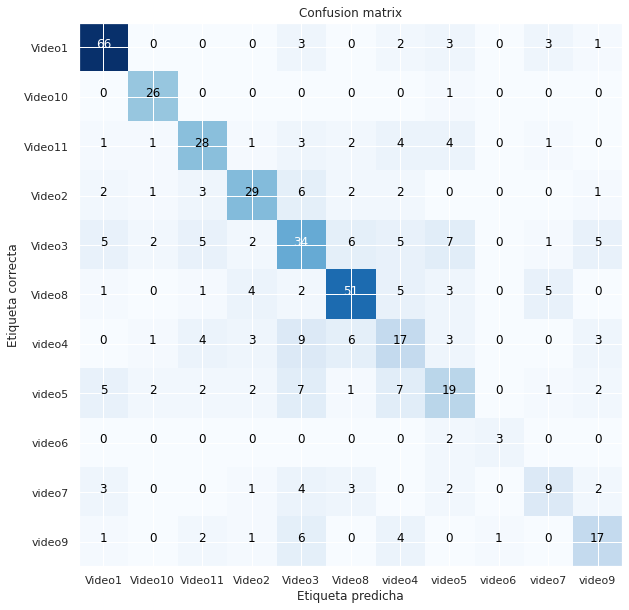

In [61]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 10))
ax = plt.axes()
utils.plot_confusion_matrix(cm, videos_names, ax=ax)
plt.show()

In [62]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,22],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['auto']
    }

cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid, scoring='accuracy', cv=5)
cv_dt.fit(X_train, y_train)

results = cv_dt.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_criterion param_max_depth param_min_samples_leaf  mean_test_score  \
21         entropy              15                      5         0.591521   
27         entropy              22                      5         0.589770   
24         entropy              20                      5         0.589770   
6             gini              15                      5         0.585555   
18         entropy              10                      5         0.584166   
9             gini              20                      5         0.581358   
12            gini              22                      5         0.581358   
22         entropy              15                     10         0.565591   
25         entropy              20                     10         0.565591   
28         entropy              22                     10         0.565591   
19         entropy              10                     10         0.558228   
7             gini              15                     10         0.554725   
13            gini              22                     10         0.554374   
10            gini              20                     10         0.554374   
8             gini              15                     15         0.549810   
11            gini              20                     15         0.548060   
14            gini              22                     15         0.548060   
3             gini              10                      5         0.530540   
23         entropy              15                     15         0.528435   
26         entropy              20                     15         0.528435   
29         entropy              22                     15         0.528435   
20         entropy              10                     15         0.527734   
4             gini              10                     10         0.525972   
5             gini              10                     15         0.521407   
0             gini               5                      5         0.448516   
2             gini               5                     15         0.447113   
1             gini               5                     10         0.446061   
16         entropy               5                     10         0.442252   
17         entropy               5                     15         0.440851   
15         entropy               5                      5         0.429992   

    std_test_score  rank_test_score  
21        0.216159                1  
27        0.218933                2  
24        0.218933                2  
6         0.204814                4  
18        0.214517                5  
9         0.215177                6  
12        0.215177                6  
22        0.192129                8  
25        0.192129                8  
28        0.192129                8  
19        0.187207               11  
7         0.208831               12  
13        0.210324               13  
10        0.210324               13  
8         0.181329               15  
11        0.181354               16  
14        0.181354               16  
3         0.187306               18  
23        0.194828               19  
26        0.194828               19  
29        0.194828               19  
20        0.189653               22  
4         0.195206               23  
5         0.164595               24  
0         0.129659               25  
2         0.127722               26  
1         0.128945               27  
16        0.177037               28  
17        0.174543               29  
15        0.201124               30

In [63]:
print(f"model score: {cv_dt.score(X_test, y_test)}")
print(f"f1 score: {f1_score(cv_dt.predict(X_test), y_test, average=None)}")

model score: 0.5515151515151515
f1 score: [0.70512821 0.66666667 0.64583333 0.46511628 0.48780488 0.72972973
 0.33333333 0.34567901 0.42857143 0.44897959 0.44827586]


A continuación, repetimos el análisis sólo con las características de los canales de color, para ver si estos valores son relevantes a la hora de determinar el video al que pertenece la muestra.

In [64]:
X_train_ch = X_train[["ch_R", "ch_G", "ch_B"]]
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,22],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['auto']
    }

cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid, scoring='accuracy', cv=5)
cv_dt.fit(X_train_ch, y_train)

results = cv_dt.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

param_criterion param_max_depth param_min_samples_leaf  mean_test_score  \
9             gini              20                      5         0.527741   
12            gini              22                      5         0.527741   
6             gini              15                      5         0.525643   
27         entropy              22                      5         0.523896   
24         entropy              20                      5         0.523896   
21         entropy              15                      5         0.521794   
22         entropy              15                     10         0.513720   
25         entropy              20                     10         0.513720   
28         entropy              22                     10         0.513720   
19         entropy              10                     10         0.502849   
7             gini              15                     10         0.500052   
10            gini              20                     10         0.500052   
13            gini              22                     10         0.500052   
18         entropy              10                      5         0.499010   
20         entropy              10                     15         0.496210   
14            gini              22                     15         0.490253   
8             gini              15                     15         0.490253   
11            gini              20                     15         0.490253   
3             gini              10                      5         0.488164   
4             gini              10                     10         0.486049   
5             gini              10                     15         0.482543   
23         entropy              15                     15         0.480425   
26         entropy              20                     15         0.480425   
29         entropy              22                     15         0.480425   
17         entropy               5                     15         0.422964   
0             gini               5                      5         0.418064   
15         entropy               5                      5         0.416303   
1             gini               5                     10         0.415962   
16         entropy               5                     10         0.415602   
2             gini               5                     15         0.411759   

    std_test_score  rank_test_score  
9         0.217290                1  
12        0.217290                1  
6         0.216769                3  
27        0.218612                4  
24        0.218612                4  
21        0.216456                6  
22        0.205171                7  
25        0.205171                7  
28        0.205171                7  
19        0.188687               10  
7         0.204787               11  
10        0.204787               11  
13        0.204787               11  
18        0.199205               14  
20        0.203719               15  
14        0.201695               16  
8         0.201695               16  
11        0.201695               16  
3         0.204251               19  
4         0.194542               20  
5         0.197049               21  
23        0.191794               22  
26        0.191794               22  
29        0.191794               22  
17        0.162827               25  
0         0.172658               26  
15        0.159878               27  
1         0.173680               28  
16        0.152339               29  
2         0.180693               30

In [65]:
X_test_ch = X_test[["ch_R", "ch_G", "ch_B"]]
print(f"model score: {cv_dt.score(X_test_ch, y_test)}")
print(f"f1 score: {f1_score(cv_dt.predict(X_test_ch), y_test, average=None)}")

model score: 0.4444444444444444
f1 score: [0.52702703 0.49056604 0.37623762 0.46808511 0.43209877 0.62111801
 0.36363636 0.35897436 0.         0.18518519 0.34615385]


Podemos ver que el modelo no realiza un mejor trabajo teniendo en cuenta los valores de canales de color de las imágenes.

Como conclusiones del análisis realizado con respecto al árbol de decisión para las etiquetas de los videos de origen de las imágenes, podemos ver que el modelo realiza un buen trabajo. La mayoría de los resultados se encuentran en la diagonal principal de la matriz de confusión. Sin embargo, los valores de f1-score no son muy buenos para todas las etiquetas. Pero teniendo en cuenta que los samples son imágenes recortadas de videos, al analizar un poco los errores cometidos, notamos que la discriminación en algunos de estos casos puede ser compleja para el modelo. Vemos a continuación algunos ejemplos concretos:

Video1 | Video8
- | - 
![alt](dataset/Video1-frames/test/Video1-frame-000342.jpg) | ![alt](dataset/Video8-frames/test/Video8-frame-001393.jpg)


Video3 | Video5
- | - 
![alt](dataset/Video3-frames/test/Video3-frame-000006.jpg) | ![alt](dataset/Video5-frames/test/video5-frame-000133.jpg)

## Conclusiones
- Se utilizaron los mismos criterios de seleccion de variables que en los notebooks anteriores, es decir , no se usalor las variables categoricas de tipo index como "filename" o "use". Y se empleo el metodo de chi2 para la seleccion de los features principales. 
- En los estudios de regresion se observo como el metodo no resulta optimo para la variable categorica clase, pero si para la variable continua ch_R. 
- Se estudio la performance con varios grados de polinomio usando un gred 
- Al entrenar modelos de clasificación de variables binarias con algunos de los features de ResNet-18, se obtienen buenos resultados (f-score de 0.95 aproximadamente utilizando solo 2 variables).
- La selección de hiperparámetros del modelo, junto con la selección de features utilizados para el entrenamiento, son factores determinantes para la performance final de los modelos sobre los datos de prueba.
- Los etiquetados erróneos por el modelo, pueden comprobarse a simple vista que en general, corresponden a datos ruidosos o que podrían causar confusión al etiquetar incluso para un ser humano.
- Pudimos comprobar que estos modelos simples, son buenos clasificadores dadas las entradas adecuadas.

 ### <font color='red'> Correcciones:.</font>
 * Muy Buen trabajo y analasis realizado! 
 * Falto los analisis de hiperparámetros de los metodos de regularización. 

## Actualización:
- Se agegaron hiperparámetros de regularización para los métodos lineales.